**avtor: Anže Mramor** 

**UL ID: 27212071**

**marec 2023**

# Izbira metode in optimizacija hiperparametrov

## Ročno

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("podatki.csv")
df = df.replace(['teamEdward', 'teamJacob'], [0, 1])
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x22,x23,x24,x25,x26,x27,x28,x29,x30,y
0,2.0,2.12,3.0,11.0,7.56,54.81,14.0,69.0,10.0,11.13,...,96.0,4404.26,484.15,246.57,2.50,4.0,4.0,4.0,4.0,0
1,2.0,2.50,2.0,3.0,2.00,20.13,12.0,15.0,13.0,9.50,...,36.0,1022.00,138.00,58.67,2.33,2.0,2.0,2.0,4.0,0
2,5.0,2.32,6.0,11.0,22.00,25.15,20.0,52.0,40.0,31.25,...,140.0,19808.66,679.15,1102.37,2.10,2.0,2.0,2.0,9.0,0
3,2.0,2.17,56.0,14.0,83.82,31.79,13.0,141.0,13.0,10.94,...,58.0,2381.82,268.27,134.21,2.50,2.0,2.0,2.0,3.0,0
4,2.0,2.36,2.0,3.0,2.00,26.22,18.0,15.0,16.0,14.71,...,63.0,3911.70,309.71,219.21,2.75,2.0,2.0,2.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,13.0,2.14,19.0,33.0,29.45,73.39,20.0,137.0,63.0,26.46,...,293.0,42703.09,1748.00,2374.28,2.33,23.0,4.0,22.0,12.0,1
1199,6.0,2.27,2.0,5.0,38.36,22.85,11.0,18.0,11.0,7.00,...,27.0,523.24,106.25,30.96,2.33,6.0,4.0,6.0,4.0,1
1200,6.0,2.22,13.0,24.0,33.91,45.42,18.0,73.0,37.0,16.61,...,122.0,9267.54,636.25,516.75,2.13,15.0,4.0,14.0,7.0,1
1201,3.0,2.13,5.0,9.0,17.38,24.30,14.0,39.0,14.0,15.80,...,71.0,4248.27,309.70,237.90,2.33,6.0,4.0,6.0,5.0,1


Izpišimo si podatke in si jih ogledamo. Vidimo, da bo šlo za klasifikacijski problem.

Ogledamo si še lastnosti podatkov, da preverimo, če je treba morda podatke še kako preurediti.

In [3]:
st_stolpcev = len(df.columns)
st_vrstic = len(df.index)
print(st_stolpcev, st_vrstic)
print(df.dtypes)

31 1203
x1     float64
x2     float64
x3     float64
x4     float64
x5     float64
x6     float64
x7     float64
x8     float64
x9     float64
x10    float64
x11    float64
x12    float64
x13    float64
x14    float64
x15    float64
x16    float64
x17    float64
x18    float64
x19    float64
x20    float64
x21    float64
x22    float64
x23    float64
x24    float64
x25    float64
x26    float64
x27    float64
x28    float64
x29    float64
x30    float64
y        int64
dtype: object


In [4]:
print(df.describe())
df.isnull().sum()

                x1           x2           x3           x4           x5  \
count  1203.000000  1203.000000  1203.000000  1203.000000  1203.000000   
mean      4.327515     2.320357     7.164589     9.213633    20.258030   
std       5.669118     0.248226     9.740622     9.618518    21.457257   
min       2.000000     2.000000     2.000000     2.000000     2.000000   
25%       2.000000     2.160000     2.000000     3.000000     2.000000   
50%       2.000000     2.250000     3.000000     6.000000    12.000000   
75%       4.000000     2.400000     8.000000    12.000000    34.090000   
max      70.000000     3.260000    79.000000    92.000000    95.020000   

                x6           x7           x8           x9          x10  ...  \
count  1203.000000  1203.000000  1203.000000  1203.000000  1203.000000  ...   
mean     29.335536    13.987531    40.458022    21.133001    18.897764  ...   
std      74.672317     6.673314    43.818779    26.750165    16.785843  ...   
min       2.00000

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
x23    0
x24    0
x25    0
x26    0
x27    0
x28    0
x29    0
x30    0
y      0
dtype: int64

array([[<Axes: title={'center': 'x1'}>, <Axes: title={'center': 'x2'}>,
        <Axes: title={'center': 'x3'}>, <Axes: title={'center': 'x4'}>,
        <Axes: title={'center': 'x5'}>, <Axes: title={'center': 'x6'}>],
       [<Axes: title={'center': 'x7'}>, <Axes: title={'center': 'x8'}>,
        <Axes: title={'center': 'x9'}>, <Axes: title={'center': 'x10'}>,
        <Axes: title={'center': 'x11'}>, <Axes: title={'center': 'x12'}>],
       [<Axes: title={'center': 'x13'}>, <Axes: title={'center': 'x14'}>,
        <Axes: title={'center': 'x15'}>, <Axes: title={'center': 'x16'}>,
        <Axes: title={'center': 'x17'}>, <Axes: title={'center': 'x18'}>],
       [<Axes: title={'center': 'x19'}>, <Axes: title={'center': 'x20'}>,
        <Axes: title={'center': 'x21'}>, <Axes: title={'center': 'x22'}>,
        <Axes: title={'center': 'x23'}>, <Axes: title={'center': 'x24'}>],
       [<Axes: title={'center': 'x25'}>, <Axes: title={'center': 'x26'}>,
        <Axes: title={'center': 'x27'}>, <A

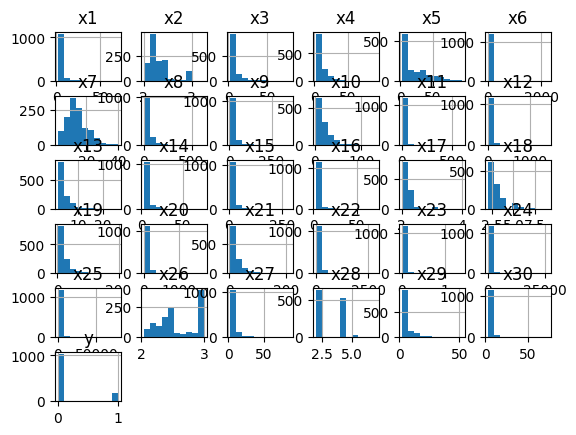

In [5]:
df.hist()

In [6]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,y
x1,1.00,-0.25,0.36,0.49,0.45,0.35,0.35,0.55,0.31,0.43,0.46,0.58,0.20,0.24,0.32,0.11,-0.17,-0.02,0.45,0.57,0.61,0.58,0.53,0.56,0.53,-0.18,0.45,0.27,0.47,0.12,0.43
x2,-0.25,1.00,-0.30,-0.39,-0.40,-0.17,-0.42,-0.31,-0.02,-0.30,-0.25,-0.23,-0.19,0.06,-0.04,0.11,0.73,-0.01,-0.34,-0.25,-0.35,-0.25,-0.13,-0.20,-0.13,0.11,-0.19,-0.34,-0.23,0.05,-0.26
x3,0.36,-0.30,1.00,0.73,0.63,0.11,0.39,0.71,0.29,0.40,0.24,0.29,0.30,0.26,0.29,0.20,-0.27,0.00,0.49,0.35,0.51,0.33,0.26,0.27,0.26,-0.16,0.56,0.30,0.55,0.12,0.08
x4,0.49,-0.39,0.73,1.00,0.52,0.20,0.51,0.82,0.35,0.49,0.37,0.41,0.40,0.32,0.35,0.19,-0.32,-0.07,0.60,0.46,0.64,0.45,0.34,0.39,0.34,-0.23,0.56,0.40,0.59,0.21,0.19
x5,0.45,-0.40,0.63,0.52,1.00,0.09,0.23,0.41,0.04,0.18,0.14,0.13,0.17,0.02,0.05,-0.01,-0.39,-0.07,0.15,0.15,0.23,0.15,0.08,0.12,0.08,-0.07,0.29,0.32,0.29,-0.04,0.31
x6,0.35,-0.17,0.11,0.20,0.09,1.00,0.12,0.31,0.32,0.09,0.91,0.69,0.17,0.08,0.38,0.05,-0.11,-0.04,0.38,0.63,0.41,0.67,0.28,0.77,0.28,-0.01,0.06,0.02,0.06,0.09,0.11
x7,0.35,-0.42,0.39,0.51,0.23,0.12,1.00,0.56,0.61,0.77,0.40,0.44,0.47,0.63,0.58,0.42,-0.20,0.09,0.71,0.50,0.71,0.48,0.42,0.41,0.42,-0.41,0.48,0.37,0.50,0.48,0.14
x8,0.55,-0.31,0.71,0.82,0.41,0.31,0.56,1.00,0.59,0.61,0.52,0.62,0.48,0.53,0.59,0.35,-0.28,0.03,0.80,0.66,0.82,0.65,0.56,0.60,0.56,-0.25,0.59,0.29,0.60,0.39,0.19
x9,0.31,-0.02,0.29,0.35,0.04,0.32,0.61,0.59,1.00,0.63,0.57,0.62,0.58,0.93,0.99,0.70,0.05,0.08,0.75,0.61,0.73,0.63,0.56,0.60,0.56,-0.24,0.42,0.08,0.42,0.82,0.04
x10,0.43,-0.30,0.40,0.49,0.18,0.09,0.77,0.61,0.63,1.00,0.33,0.59,0.29,0.64,0.61,0.44,-0.14,0.13,0.74,0.63,0.75,0.63,0.67,0.52,0.67,-0.30,0.52,0.28,0.55,0.43,0.14


Opazimo, da so podatki že v primerni obliki za strojno učenje, ni jih treba spreminjati. Morda nas lahko rahlo skrbijo nekatere spremenljivke, ki imajo visoko koreliranost z drugimi, vendar se bomo s tem po potrebi ukvarjali kasneje.

Razdelimo podatke na učno in testno množico

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop("y", axis=1)
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Izberemo si 5 osnovnih klasifikacijskih modelov - **KNN(3)**, **DecisionTreeClassifier**, **GaussianNB**, **RandomForestClassifier** in **GradientBoostingClassifier**. Vse modele s 5-kratnim prečnim preverjanjem naučimo na učni množici in izračunamo ploščino pod ROC krivuljo (AUC). Izberemo tistega z najvišjim povprečnim AUC.

In [8]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_validate

np.random.seed(42)

k = 5
knn = KNeighborsClassifier(3)
drevo = DecisionTreeClassifier()
bayes = GaussianNB()
gozd = RandomForestClassifier()
gbc = GradientBoostingClassifier()

seznam_metod = [knn, drevo, bayes, gozd, gbc]
scores_auc = {}

for metoda in seznam_metod:
    score = cross_validate(metoda, X_train, y_train, cv=k,
                           scoring = ('roc_auc'))
    auc = round(np.mean(score['test_score']),4)
    scores_auc[metoda] = auc

print(scores_auc)

{KNeighborsClassifier(n_neighbors=3): 0.5993, DecisionTreeClassifier(): 0.7363, GaussianNB(): 0.8278, RandomForestClassifier(): 0.9305, GradientBoostingClassifier(): 0.9284}


Vidimo, da je najboljša metoda po metriki AUC **RandomForestClassifier**. Poglejmo katere hiperparametre ima.

In [9]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

Opazimo, da ima ta metoda veliko hiperparametrov. Izberimo si par smiselnih, ki jih bomo uporabili:

- *criterion*: s katero funkcijo bomo merili kvaliteto delitve ("gini", "entropy", "log_loss")

- *max_depth*, *max_features*, *max_leaf_nodes*, *max_samples*, *min_impurity_decrease*, *min_samples_leaf*, *min_samples_split*, *min_weight_fraction_leaf* se vse tako ali drugače navezujejo na velikost oziroma globino drevesa. Ker imamo binarno klasifikacijo, je pomembno, da je v listih dovolj primerov, da bo napoved zanesljiva. Izberemo si torej *min_samples_leaf*, prek katere bomo modelu podali najmanjše število primerov v listu (0.5%, 1%, 2%, 5%, 10%, 20% podatkov)

- *n_estimators*: najpomembnejši hiperparameter, pomeni število dreves v gozdu (10, 50, 100, 200, 300, 500)

In [10]:
delez = [0.005, 0.01, 0.02, 0.05, 0.1, 0.2]
min_leaf = [int(np.floor(st_vrstic * i)) for i in delez]
min_leaf

[6, 12, 24, 60, 120, 240]

Z vgrajeno funkcijo *GridSearchCV* poiščemo optimalne vrednosti hiperparametrov za naš izbran nabor.

In [11]:
from sklearn.model_selection import GridSearchCV
np.random.seed(42)

params_RF = {'criterion': ["gini", "entropy", "log_loss"],
             'min_samples_leaf': min_leaf,
             'n_estimators': [10,50,100,200,300,500]}
gs_RF = GridSearchCV(estimator=gozd, 
                 param_grid=params_RF, 
                 cv=k,   
                 verbose=1, 
                 scoring='roc_auc') 
gs_RF.fit(X_train, y_train)

gs_RF.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'criterion': 'log_loss', 'min_samples_leaf': 6, 'n_estimators': 200}

Dobili smo optimalne vrednosti hiperparametrov:

- *criterion*: 'log_loss',

- *min_samples_leaf*: 6,

- *n_estimators*: 200. 

Poračunajmo sedaj vrednost AUC modela na testni množici in izrišimo ROC krivuljo.

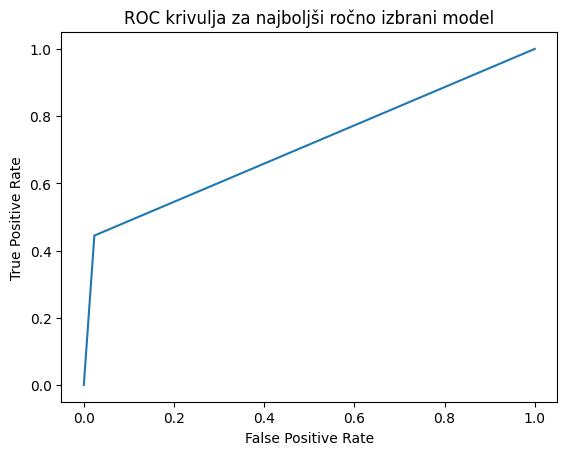

In [14]:
import matplotlib.pyplot as plt

#rocni_best = RandomForestClassifier(criterion= 'log_loss', min_samples_leaf = 6, n_estimators = 200)
#rocni_best.fit(X_train, y_train)
predicted = gs_RF.predict(X_test)

# poračunamo ROC krivuljo
#auc = roc_auc_score(y_test, predicted)
fpr, tpr, _ = roc_curve(y_test, predicted)

# narišemo ROC krivuljo
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC krivulja za najboljši ročno izbrani model')
plt.show()

In [15]:
auc_rocni = roc_auc_score(y_test, predicted)
auc_rocni

0.7105399792315681

Dobili smo solidno oceno AUC, ki je seveda slabša kot ocena v prečnem preverjanju, vendar se zdi precej optimistična. Z našim ročnim izborom smo zadovoljni.

## Avtomatizirano

Izberemo enake algoritme kot v prvi točki, le da sedaj izvajamo izbiro modela in optimizacijo hiperparametrov avtomatsko s *hyperopt*

In [16]:
from hyperopt import hp, tpe, rand, fmin, Trials, space_eval
from hyperopt import pyll, base

In [37]:
prostor_konfiguracij = {
    "algo": hp.choice('algo', [
        {
            'ime': 'knn',
            'n_neighbors': hp.quniform('n_neighbors', 1, 50, 1)
        },
        {
            'ime': 'drevo',
            'criterion': hp.choice('criterion', ["gini", "entropy", "log_loss"]),
            'min_samples_leaf': hp.quniform('min_samples_leaf', 10, 240, 10) 
        },
        {
            'ime': "bayes",
            'var_smoothing': hp.loguniform('var_smoothing', -20, 0)
        },
        {
            'ime': "gozd",
            'criterion': hp.choice('criterion1', ["gini", "entropy", "log_loss"]),
            'min_samples_leaf': hp.quniform('min_samples_leaf1', 10, 240, 10),
            'n_estimators': hp.qloguniform('n_estimators1', 2, 8, 10)
        },
        {
            'ime': "gbc",
            'criterion': hp.choice('criterion2', ["friedman_mse", "squared_error"]),
            'min_samples_leaf': hp.quniform('min_samples_leaf2', 10, 240, 10),
            'n_estimators': hp.qloguniform('n_estimators2', 2, 8, 10)
        }
    ])
}

Za vsakega izmed algoritmov si izberemo hiperparametre, ki jih bomo nastavljali in navedemo vrednosti.

- Za KNN bomo izbirali sosede s quniform na intervalu med 1 in 50. Take meje smo si izbrali, ker so ponavadi števila sosedov iz takšnega intervala najbolj aktualna, poleg tega pa za metodo KNN potrebujemo celo število.

- Za model naivnega Bayesa bomo optimizirali hiperparameter *var_smoothing*, s čemer nastavljamo delež največje variance vseh spremenljivk, ki je dodana variancam za računsko stabilnost. Naivni Bayes že sam po sebi nima preveč zanimivih hiperparametrov, zato je optimiziranje tu bolj formalnost

- Za modele odločitvenega drevesa, naključnih gozdov in GradientBoostClassifier vzamemo enake hiperparametre, da jih bomo lažje medsebojno primerjali, saj predvidevamo, da bo optimalni model eden izmed njih. Izberemo *min_samples_leaf*, torej najmanjše zahtevano število vzorcev, da je vozlišče še lahko list, kjer izbiramo s quniform na intervalu med 10 in 240, s korakom 10 (glede na količino podatkov je 240 približno petina podatkov, kar je sicer že precej visoka meja, vendar se jo splača preizkusiti). Upoštevali smo tudi, da bo čas učenja precej daljši, če bomo vrednosti nastavili prenizko, zato jih nekoliko povišamo v primerjavi z ročnim iskanjem. Drugi skupni hiperparameter je *criterion*, pri vsakem izmed modelov vzamemo vse kriterijske funkcije za ocenjevanje kvalitete delitve, ki so na voljo. Zadnji hiperparameter je *n_estimators*, torej število dreves v posameznem gozdu, ki je specifičen za zadnja dva algoritma. Za iskanje vrednosti uporabimo qloguniform, saj lahko tako z ožjim intervalom dosežemo precej višje vrednosti kot pri prvem hiperparametru. 

In [47]:
k = 5

def kriterijska_funkcija(parametri):
    np.random.seed(42)
    a = parametri["algo"]
    ime_algoritma = a["ime"]
    if ime_algoritma == "knn":
        model = KNeighborsClassifier(n_neighbors=int(a["n_neighbors"]))

    elif ime_algoritma == "drevo":
        model = DecisionTreeClassifier(criterion=a["criterion"],
                                        min_samples_leaf = int(a["min_samples_leaf"]))
        
    elif ime_algoritma == "bayes":
        model = GaussianNB(var_smoothing = a["var_smoothing"])

    elif ime_algoritma == "gozd":
        model = RandomForestClassifier(criterion=a["criterion"],
                                       min_samples_leaf = int(a["min_samples_leaf"]),
                                       n_estimators = int(a["n_estimators"]))

    elif ime_algoritma == "gbc":
        model = GradientBoostingClassifier(criterion=a["criterion"],
                                       min_samples_leaf = int(a["min_samples_leaf"]),
                                       n_estimators = int(a["n_estimators"]))

    else:
        raise ValueError("Napačne nastavitve!")

    score = cross_validate(model, X_train, y_train, cv=k,
                           scoring = ('roc_auc'))
    auc = np.mean(score['test_score'])

    return 1-auc

Kriterijsko funkcijo sestavimo po zgledu iz vaj. Naša metrika je AUC. Ker funkcija *fmin* minimizira končno vrednost, mora torej naša kriterijska funkcija vrniti vredno 1-AUC (bližje 0 kot smo, boljši je rezultat).

In [50]:
np.random.seed(42)
trials = Trials()
best = fmin(fn = kriterijska_funkcija,
            space = prostor_konfiguracij,
            algo = tpe.suggest,
            max_evals = 1000,
            trials = trials
)

100%|██████████| 1000/1000 [21:19<00:00,  1.28s/trial, best loss: 0.06666772133084786] 


In [51]:
best1 = space_eval(prostor_konfiguracij, best)
best_value = kriterijska_funkcija(best1)

print(best1, best_value)

{'algo': {'criterion': 'friedman_mse', 'ime': 'gbc', 'min_samples_leaf': 20.0, 'n_estimators': 50.0}} 0.06666772133084786


Poženemo samo 1000 krogov, kar sicer traja precej časa ampak se splača. Za najboljši algoritem nam *hyperopt* predlaga **GradientBoostingClassifier** s hiperparametri:

- *criterion* = 'friedman_mse',

- *min_samples_leaf* = 20,

- *n_estimators* = 50.

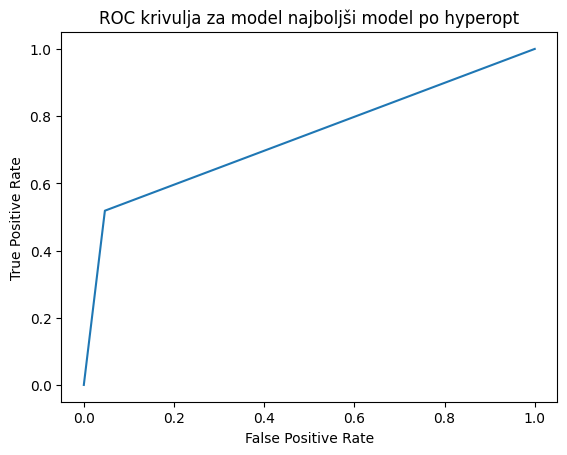

In [52]:
avtomatski_best = GradientBoostingClassifier(criterion = 'friedman_mse', min_samples_leaf = 20, n_estimators = 50)
avtomatski_best.fit(X_train, y_train)
predicted = avtomatski_best.predict(X_test)

# poračunamo ROC krivuljo
#auc = roc_auc_score(y_test, predicted)

fpr, tpr, _ = roc_curve(y_test, predicted)

# narišemo ROC krivuljo
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC krivulja za model najboljši model po hyperopt')
plt.show()

In [53]:
auc_hyperopt = roc_auc_score(y_test, predicted)
auc_hyperopt

0.7358947732779509

Opazimo lahko, da je AUC v primeru avtomatizirane optimizacije boljši kot pri ročnem nastavljanju, vendar se razlikujeta le za približno 0.02, kar pri vrednosti AUC ni prav veliko. To nam pove, da je naš izbrani model iz 1. točke zelo uporaben, za količino vloženega truda za njegovo pridobitev je rezultat odličen. Verjetno je razlog v tem, da smo že v točki 1.1 naredili prečno preverjanje in preizkusili več modelov, tako da smo že tam dobili precej dober model. Vsekakor pa je jasno, da lahko z avtomatiziranim iskanjem še izboljšamo naše rezultate. Seveda bi se splačalo preizkusiti še širši spekter vrednosti, morda tudi izvesti več evaluacij, saj lahko obstaja kombinacija hiperparametrov, ki je še boljša kot ta, ki nam jo je algoritem predlagal.

Izrišimo še graf porazdelitev zmogljivosti za različne konfiguracije. Ker je možnosti precej, si izberemo **RandomForestClassifier** in **GradientBoostingClassifier** - najboljšega po AUC pri ročnem in avtomatskem iskanju. Pri obeh spreminjajmo samo parametra *min_samples_split* in *n_estimators*, vsakega posebej, medtem ko so ostali hiperparametri konstantni, ter narišimo rezultate.

Text(0, 0.5, 'AUC')

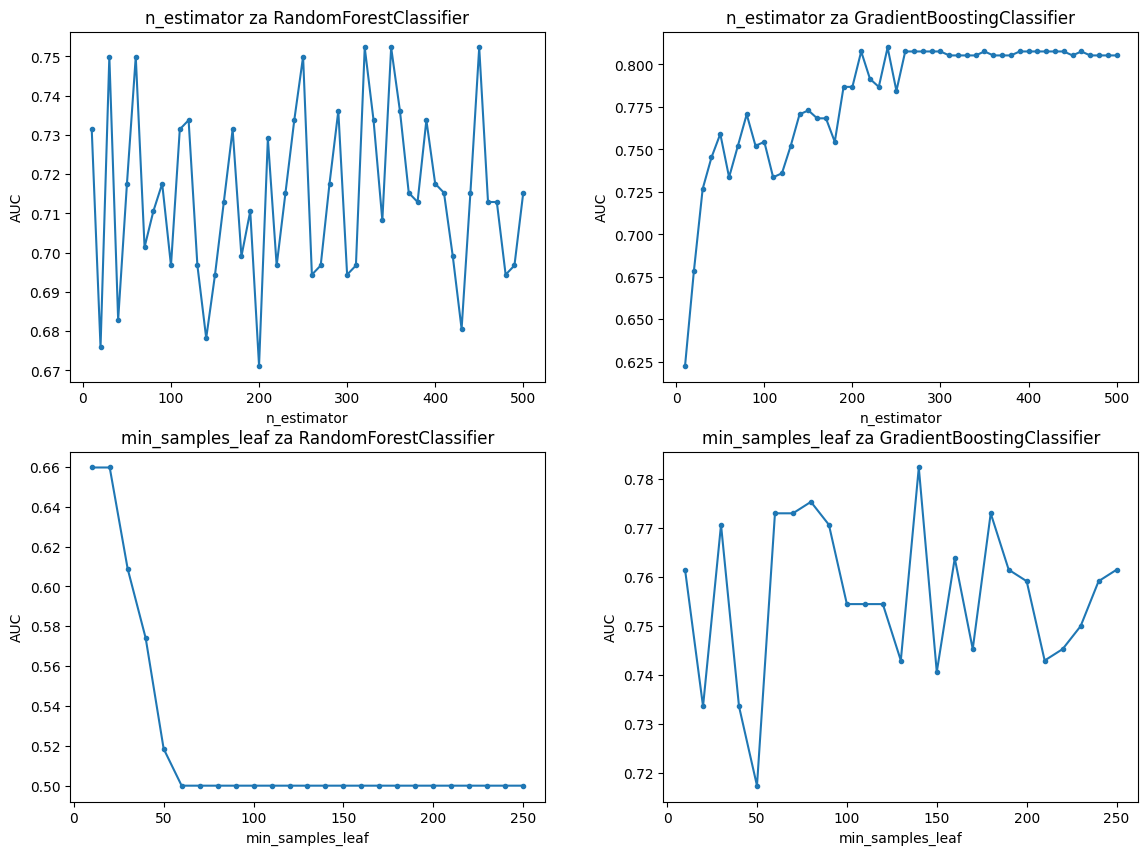

In [56]:
np.random.seed(42)
fig, ax = plt.subplots(2, 2, figsize = (12, 10))
plt.subplots_adjust(wspace = 0.25, right = 0.98, left = 0.09)

n_est = [x for x in range(10, 510, 10)]
msl = [x for x in range(10, 260, 10)]

auc_n_r = []
auc_n_g = []
for n in n_est:
    rfc = RandomForestClassifier(n_estimators = n)
    gbc = GradientBoostingClassifier(n_estimators= n)
    rfc.fit(X_train, y_train)
    gbc.fit(X_train, y_train)
    auc_n_r.append(roc_auc_score(y_test, rfc.predict(X_test)))
    auc_n_g.append(roc_auc_score(y_test, gbc.predict(X_test)))

auc_m_r = []
auc_m_g = []
for m in msl:
    rfc = RandomForestClassifier(min_samples_leaf= m)
    gbc = GradientBoostingClassifier(min_samples_leaf= m)
    rfc.fit(X_train, y_train)
    gbc.fit(X_train, y_train)
    auc_m_r.append(roc_auc_score(y_test, rfc.predict(X_test)))
    auc_m_g.append(roc_auc_score(y_test, gbc.predict(X_test)))

ax[0][0].plot(n_est, auc_n_r, '.-')
ax[0][0].set_title("n_estimator za RandomForestClassifier")
ax[0][0].set_xlabel("n_estimator")
ax[0][0].set_ylabel("AUC")

ax[0][1].plot(n_est, auc_n_g, '.-')
ax[0][1].set_title("n_estimator za GradientBoostingClassifier")
ax[0][1].set_xlabel("n_estimator")
ax[0][1].set_ylabel("AUC")

ax[1][0].plot(msl, auc_m_r, '.-')
ax[1][0].set_title("min_samples_leaf za RandomForestClassifier")
ax[1][0].set_xlabel("min_samples_leaf")
ax[1][0].set_ylabel("AUC")

ax[1][1].plot(msl, auc_m_g, '.-')
ax[1][1].set_title("min_samples_leaf za GradientBoostingClassifier")
ax[1][1].set_xlabel("min_samples_leaf")
ax[1][1].set_ylabel("AUC")

Opazimo lahko, da bi bila optimalna vrednost hiperparametra *n_estimators* 90 (ali izbrane vrednosti nad 200) za **RandomForestClassifier**, ter vsaj 200 ali celo 300 za **GradientBoostingClassifier**. Pri *min_samples_leaf* sta pripadajoči vrednosti za vsakega izmed modelov 20 in 140. To se sicer ne sklada z našimi rezultati od prej, saj smo dobili popolnoma drugačne vrednosti. Treba pa je upoštevati, da smo v tem primeru optimizirali vsakega izmed parametrov posebej, medtem ko smo prej iskali optimalno kombinacijo več parametrov. Bolj zanimivo je opazovati, kako se vrednost AUC v splošnem spremnija pri posamaznem modelu za posamezen parameter. Vidimo lahko namreč, da AUC za višje vrednosti *n_estimators* za model **GradientBoostingClassifier** raste (vse do 300, ko se bolj ali manj ustali okoli 0.8 AUC), medtem ko vrednost AUC za model **RandomForestClassifier** skače za različne vrednosti 'n', brez nekega pravila, vseskozi pa se giblje okoli 0.71. Po drugi strani je pri hiperparametru *min_samples_leaf* stvar obrnjena - za višje vrednosti v modelu **RandomForestClassifier** AUC pada (po 50 se ustali okoli 0.5), medtem ko za **GradientBoostingClassifier** vrednost AUC skače okol 0.75. Torej je celotna vrednost AUC modela res najbolje določljiva v kombinaciji več hiperparametrov, ki se medsebojno utežijo in dopolnjujejo.

Zanimivo je tudi opaziti, da je večina izračunanih vrednosti AUC tu višja, kot vrednost AUC v naših "optimalnih" primerih. To nas ne skrbi preveč, saj smo za izračun uporabili testno množico, kar pomeni, da smo testno množico porabili za odločitev o tem katere vrednosti hiperparamterov bi bile najbolj optimalne. Te vrednosti nam ne povedo nič o tem kakšna bi bila potem prava vrednost AUC, saj bi zanjo potrebovali še dodatno testno množico. Verjetno bi bilo simiselno tudi izrisati te grafe preden smo pognajali avtomatski algoritem izbiranja, vendar potem s takšnim pristopom, kot je bil uporabljen, ne bi več imeli na voljo testne množice za testiranje optimalnega modela.

# Meta učenje

Če želimo najti približno podobno podatkovje moramo iskati vse take, ki imajo največ 100 značilk več kot naše podatkovje in največ 1000 primerov več kot naše podatkovje. Meje vzamemo nekoliko večje, za vsak slučaj (saj dodatna vrstica podatkov ali dodatna značilka nikoli zares ne škodi). Prav tako ne smejo imeti manjkajočih vrednosti.

In [57]:
import openml as oml
d = oml.datasets.list_datasets(number_instances='1200..2205', number_features='30..132', output_format="dataframe")
data_ids = list(d["did"])
podatkovja_vsa = oml.datasets.get_datasets(data_ids)

Poiskati moramo tista, ki so primerna za klasifikacijo. Postopamo enako kot na vajah.

In [58]:
podatkovja_ok = {}
for n, podatkovje in enumerate(podatkovja_vsa):
    ime_podatkovja = podatkovje.name
    target = podatkovje.default_target_attribute
    X, _, nominal, names = podatkovje.get_data()
    # Vec pogojev, da podatkovje obdrzimo:

    # ce ga nismo ze prej (tj. neke druge verzije)
    name_ok = ime_podatkovja not in podatkovja_ok

    # ce ima znan target in je target en sam (in ne npr. "Spol,Starost")
    targ_ok = target is not None and "," not in target

    # ce je target nominalen (klasifikacija) in podatki nimajo nominalnih atributov
    i_target = names.index(target) if targ_ok else 0
    nomi_ok = nominal[i_target] and sum(nominal) == 1  # natanko en nominalen in to je target
    if name_ok and targ_ok and nomi_ok:
        podatkovja_ok[ime_podatkovja] = n

#del podatkovja_ok['ibm-employee-performance']

n_vsa = len(podatkovja_vsa)
n_ok = len(podatkovja_ok)
print(f"Obdrzal sem {n_ok} podatkovij ({100 * n_ok / n_vsa:.1f}%)")

Obdrzal sem 119 podatkovij (48.0%)


Določimo metaznačilke našega podatkovja - uporabimo postopek iz vaj

In [59]:
from pymfe.mfe import MFE

meta_features_nas = {"name": 'nase_podatkovje', "id": 0}
x = np.array(df.drop("y", axis=1))
y = np.array(df["y"])

x = np.array(x)
y = np.array([str(t) for t in y])  # Ker je prej y tu in tam vseboval True in False
mfe = MFE(groups=["general", "info-theory"]) 
mfe.fit(x, y)
attribute_names, attribute_values = mfe.extract()
for a_name, a_value in zip(attribute_names, attribute_values):
    meta_features_nas[a_name] = [a_value]
meta_znacilke0 = pd.DataFrame(data=meta_features_nas, index=None).dropna(axis=1) #odstranimo tiste z Nan vrednostmi
meta_znacilke0.to_csv("meta_features_nas.csv", index=False)
meta_znacilke0

,name,id,attr_conc.mean,attr_conc.sd,attr_ent.mean,attr_ent.sd,attr_to_inst,cat_to_num,class_conc.mean,class_conc.sd,...,joint_ent.sd,mut_inf.mean,mut_inf.sd,nr_attr,nr_bin,nr_cat,nr_class,nr_inst,nr_num,ns_ratio
0,nase_podatkovje,0,0.103155,0.123346,2.799333,0.701138,0.024938,0.0,0.019535,0.029033,...,0.71064,0.059898,0.043466,30,0,0,2,1203,30,45.7348


Uporabimo spodnje metaznačilke (umetno dodana je 'id', ki je ne bomo uporabili).

In [60]:
print(list(meta_znacilke0.columns))

['name', 'id', 'attr_conc.mean', 'attr_conc.sd', 'attr_ent.mean', 'attr_ent.sd', 'attr_to_inst', 'cat_to_num', 'class_conc.mean', 'class_conc.sd', 'class_ent', 'eq_num_attr', 'freq_class.mean', 'freq_class.sd', 'inst_to_attr', 'joint_ent.mean', 'joint_ent.sd', 'mut_inf.mean', 'mut_inf.sd', 'nr_attr', 'nr_bin', 'nr_cat', 'nr_class', 'nr_inst', 'nr_num', 'ns_ratio']


Poiščimo metaznačilke vseh primerne sosede. Na tem koraku še enkrat prefiltriramo ves nabor, da dobimo samo tiste z binarno klasifikacijo.

In [61]:
meta_features = {"name": [], "id": []}
for ime_podatkovja, n in podatkovja_ok.items():
    x, y, nominal, names = podatkovja_vsa[n].get_data(target=podatkovja_vsa[n].default_target_attribute)
    x = np.array(x)
    y = np.array([str(t) for t in y])  # Ker je prej y tu in tam vseboval True in False

    if len(np.unique(y)) == 2: #binarna klasifikacija
        mfe = MFE(groups=["general", "info-theory"]) 
        mfe.fit(x, y)
        attribute_names, attribute_values = mfe.extract()

        is_first = len(meta_features) == 2
        meta_features["name"].append(ime_podatkovja)
        meta_features["id"].append(n)
        for a_name, a_value in zip(attribute_names, attribute_values):
            if is_first:
                meta_features[a_name] = [a_value]
            else:
                meta_features[a_name].append(a_value)
meta_znacilke = pd.DataFrame(data=meta_features, index=None).dropna(axis=1) #odstranimo Nan vrednosti
meta_znacilke.to_csv("meta_features.csv", index=False)
meta_znacilke

,name,id,attr_conc.mean,attr_conc.sd,attr_ent.mean,attr_ent.sd,attr_to_inst,cat_to_num,class_conc.mean,class_conc.sd,...,joint_ent.sd,mut_inf.mean,mut_inf.sd,nr_attr,nr_bin,nr_cat,nr_class,nr_inst,nr_num,ns_ratio
0,hill-valley,11,0.851582,0.022847,3.321915,0.000011,0.082508,0.000000,0.000899,0.000152,...,0.000991,0.005855,0.000990,100,0,0,2,1212,100,566.380328
1,steel-plates-fault,15,0.061727,0.091416,2.688061,1.310171,0.017002,0.000000,0.017400,0.032906,...,1.310258,0.051505,0.034819,33,8,0,2,1941,33,51.189972
2,communities-and-crime-binary,36,0.127263,0.264087,2.762418,1.610775,0.064193,0.007874,0.112094,0.193302,...,1.548569,0.089750,0.118715,128,1,1,2,1994,127,29.778911
3,ibm-employee-performance,39,0.059192,0.158999,2.156366,1.102285,0.022449,0.320000,0.048861,0.145838,...,1.089073,0.020857,0.107420,33,2,8,2,1470,25,102.389042
4,jannis_seed_0_nrows_2000_nclasses_10_ncols_100...,48,0.014097,0.022588,3.560236,0.127185,0.027000,0.000000,0.003588,0.005604,...,0.136631,0.026195,0.032071,54,0,0,2,2000,54,134.912243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,riccardo_seed_2_nrows_2000_nclasses_10_ncols_1...,225,0.015049,0.013007,2.312358,0.593141,0.050000,0.000000,0.001367,0.000914,...,0.589249,0.007176,0.006061,100,0,0,2,2000,100,321.256243
58,riccardo_seed_3_nrows_2000_nclasses_10_ncols_1...,226,0.010154,0.006865,2.303047,0.625189,0.050000,0.000000,0.001404,0.001101,...,0.622071,0.006911,0.005501,100,0,0,2,2000,100,332.266949
59,riccardo_seed_4_nrows_2000_nclasses_10_ncols_1...,227,0.008830,0.005713,2.355830,0.658388,0.050000,0.000000,0.011570,0.070136,...,0.653888,0.008475,0.007439,100,0,0,2,2000,100,276.972689
60,KDDCup09-Upselling_seed_2_nrows_2000_nclasses_...,245,0.251229,0.249791,0.396347,0.914078,0.050000,0.000000,0.191225,0.242965,...,0.911294,0.002316,0.005397,100,27,0,2,2000,100,170.153218


Za iskanje 3 najbližjih sosedov uporabimo metodo **NearestNeighbors**. Algoritem natreniramo na naši množici *meta_znacilke*, nato pa z modelom napovemo najbližje sosede glede na podatke v *meta_znacilke0* (pri obeh moramo seveda izpustiti stolpca *name* in *id*). Poiščemo nekoliko več kot samo 3 najbližje sosede, zato da vidimo kateri so še podobna podatkovja.

In [62]:
from sklearn.neighbors import NearestNeighbors

meta_train = meta_znacilke.drop("name", axis=1).drop("id", axis=1)
meta_test = meta_znacilke0.drop("name", axis=1).drop("id", axis=1)

knn = NearestNeighbors(n_neighbors=3).fit(meta_train)
distances, indices = knn.kneighbors(meta_test, n_neighbors=5)
print(distances)
print(indices)

[[273.8710917  554.58490444 738.35684191 799.03116639 799.04404361]]
[[ 3  0  1 38 37]]


Algoritem vrne razdalje do najbližjih sosedov in njihove indekse v tabeli *meta_znacilke*. Dobili smo torej vrstice v tabeli *meta_znacilke*, ki so po **KNN(3)** najbližje našemu podatkovju. Poglejmo si kakšne *id* imajo podatkovja v teh vrsticah in izpišimo imena podatkovij, ki nas zanimajo.

In [63]:
vrstice = indices[0]
meta_k_znac = meta_znacilke.loc[vrstice]
meta_k_znac

,name,id,attr_conc.mean,attr_conc.sd,attr_ent.mean,attr_ent.sd,attr_to_inst,cat_to_num,class_conc.mean,class_conc.sd,...,joint_ent.sd,mut_inf.mean,mut_inf.sd,nr_attr,nr_bin,nr_cat,nr_class,nr_inst,nr_num,ns_ratio
3,ibm-employee-performance,39,0.059192,0.158999,2.156366,1.102285,0.022449,0.32,0.048861,0.145838,...,1.089073,0.020857,0.107420,33,2,8,2,1470,25,102.389042
0,hill-valley,11,0.851582,0.022847,3.321915,0.000011,0.082508,0.00,0.000899,0.000152,...,0.000991,0.005855,0.000990,100,0,0,2,1212,100,566.380328
1,steel-plates-fault,15,0.061727,0.091416,2.688061,1.310171,0.017002,0.00,0.017400,0.032906,...,1.310258,0.051505,0.034819,33,8,0,2,1941,33,51.189972
38,ada_seed_4_nrows_2000_nclasses_10_ncols_100_st...,132,0.005935,0.014460,0.597804,0.787439,0.024000,0.00,0.053848,0.124588,...,0.768812,0.022857,0.039146,48,39,0,2,2000,48,25.153901
37,ada_seed_3_nrows_2000_nclasses_10_ncols_100_st...,131,0.043608,0.138169,0.591455,0.787725,0.024000,0.00,0.053723,0.123900,...,0.769110,0.022578,0.037726,48,39,0,2,2000,48,25.196264


Za vsako od najbližjih moramo iz originalne tabele *d* prebrati *did* podatkovij. To naredimo najprej z iskanjem imen in nato s filtriranjem na prvo verzijo, ker ostalih nismo upoštevali v našem naboru podatkovij, ki ustrezajo pogojem.

In [64]:
imena = meta_k_znac.loc[:,"name"]
top_podatkovja = d.loc[d["name"].isin(imena)]
top_podatkovja_1 = top_podatkovja[top_podatkovja["version"] == 1]
top_podatkovja_1

,did,name,version,uploader,status,format,MajorityClassSize,MaxNominalAttDistinctValues,MinorityClassSize,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures
1479,1479,hill-valley,1,64,active,ARFF,606.0,2.0,606.0,2.0,101.0,1212.0,0.0,0.0,100.0,1.0
1504,1504,steel-plates-fault,1,64,active,ARFF,1268.0,2.0,673.0,2.0,34.0,1941.0,0.0,0.0,33.0,1.0
43895,43895,ibm-employee-performance,1,443,active,ARFF,1244.0,NaN,226.0,2.0,34.0,1470.0,0.0,0.0,25.0,1.0
44571,44571,ada_seed_3_nrows_2000_nclasses_10_ncols_100_st...,1,32840,active,arff,1504.0,NaN,496.0,2.0,49.0,2000.0,0.0,0.0,48.0,1.0
44572,44572,ada_seed_4_nrows_2000_nclasses_10_ncols_100_st...,1,32840,active,arff,1504.0,NaN,496.0,2.0,49.0,2000.0,0.0,0.0,48.0,1.0


Na roko po navodilih pogledamo, kateri algoritmi so se najbolje odrezali:

- *hill-valley*: **SVM** (V R) (1. zadetek) in **LogisticRegression** (v pythonu) (2. zadetek)

- *steel-plates-fault*: **RandomForest** (v weka) in **AdaBoostClassifier** (v pythonu)

- *ibm-employee-performance*: **ranger** (v R) in **RandomForestClassifier** (v pythonu)

Očitno so precej dobre rezultate na podobnih podatkovjih dosegali naključni gozdovi, kar je smiselno, saj smo tudi mi v 1. točki določili kot optimalni model **RandomForestClassifier**. Opazimo lahko, da se med najboljšimi algoritmi pojavlja tudi **AdaBoostClassifier**, ki je še en izmed *boosted* algoritmov. Ni presenetljivo, da sta si bila naša najboljša algoritma tako podobna, očitno so tudi modeli, ki imajo implementiran *boost* precej dobri. Poleg tega se je dobro obnesel tudi model logistične regresije, ki je še eden od izjemno popularnih in dobrih metod za klaifikacijo (predvsem binarnih) spremenljivk. Naključnih gozdov na našem podatkovju seveda ne bomo ponovno poganjali, preizkusimo torej le **AdaBoostClassifier** in **LogisticRegression**, da ju lahko primerjamo s prej izbranima algoritmoma. Za prvega si ponovno 'na roke' izberemo par vrednost iza hiperparametre - *n_estimators* (podobno, kot smo že delali) in *learning_rate*. Za drugi model bomo optimizirali samo hiperparameter *penalty* s celotnim možnim naborom vrednosti.

In [65]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
np.random.seed(42)

ada = AdaBoostClassifier()
log = LogisticRegression()

params_ada = {'n_estimators': [10,50,100,200,300,500],
             'learning_rate': [0.1, 0.5, 1, 2, 5, 10]
           }
params_log = {'penalty': ['l1', 'l2', 'elasticnet', None]}

In [66]:
gs_ada = GridSearchCV(estimator=ada, 
                 param_grid=params_ada, 
                 cv=k,   
                 verbose=1, 
                 scoring='roc_auc') 
gs_ada.fit(X_train, y_train)

gs_ada.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'learning_rate': 0.1, 'n_estimators': 500}

In [68]:
gs_log = GridSearchCV(estimator=log, 
                 param_grid=params_log, 
                 cv=k,   
                 verbose=1, 
                 scoring='roc_auc') 
gs_log.fit(X_train, y_train)

gs_log.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


{'penalty': None}

Za **AdaBoostClassifier** smo določili optimalno vrednost hiperparametrov *learning_rate* = 0.1 in *n_estimators* = 500, za **Logisticregression** pa *penalty* = 'None'. Nato preverimo točnost obeh modelov z optimalnimi hiperparametri na testni množici in narišemo ROC krivulje.

0.7312218760816892


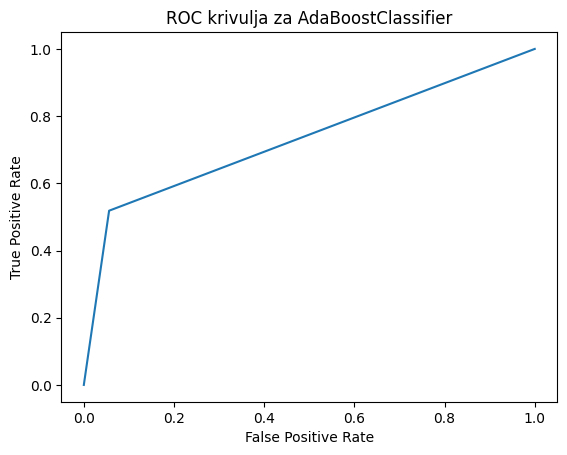

In [71]:
predicted_ada = gs_ada.predict(X_test)
predicted_log = gs_log.predict(X_test)

# poračunamo ROC krivuljo
fpr, tpr, _ = roc_curve(y_test, predicted_ada)

auc_ada = roc_auc_score(y_test, predicted_ada)
print(auc_ada)
# narišemo ROC krivuljo
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC krivulja za AdaBoostClassifier')
plt.show()

0.6641571478020075


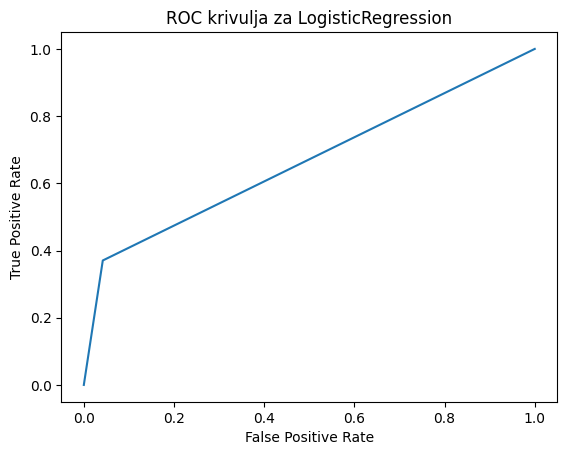

In [73]:
# poračunamo ROC krivuljo
fpr, tpr, _ = roc_curve(y_test, predicted_log)

auc_log = roc_auc_score(y_test, predicted_log)
print(auc_log)
# narišemo ROC krivuljo
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC krivulja za LogisticRegression')
plt.show()

Spomnimo se rezultatov prejšnjih dveh metod:

In [75]:
print(f"AUC modela izbranega ročno - RandomForestClassifier: {auc_rocni}")
print(f"AUC modela izbranega s hyperopt - GradientBoostClassifier: {auc_hyperopt}")
print(f"AUC modela izbranega z meta učenjem - AdaBoostClassifier: {auc_ada}")
print(f"AUC modela izbranega z meta učenjem - LogisticRegression: {auc_log}")

AUC modela izbranega ročno - RandomForestClassifier: 0.7105399792315681
AUC modela izbranega s hyperopt - GradientBoostClassifier: 0.7358947732779509
AUC modela izbranega z meta učenjem - AdaBoostClassifier: 0.7312218760816892
AUC modela izbranega z meta učenjem - LogisticRegression: 0.6641571478020075


Glede na rezultate bi torej izbrali **GradientBoostClassifier**, ker ima največji AUC. Opazimo pa lahko, da so vsi štirje algoritmi med seboj precej primerljivi, najbolj odstopa model logistične regresije. Očitno je, da ta model za naše podatkovje ne bi bil primeren, saj ga tudi optimizirati ne bi mogli več (razen z različno kombinacijo vhodnih spremenljivk). V nasprotju bi se z bolj natančno optimizacijo hiperparametrov dalo izboljšati ročno nastavljeni model, ter ga tako še bolj približati AUC vrednosti drugih dveh modela. Pričakovati pa je, da so vsi *Classifier* modeli med seboj primerljivi, saj vsi uporabljajo podobne pristope (algoritme) pri učenju. Meta učenje je seveda bilo koristno, saj smo najprej dobili še dodatno potrditev, da je naša izbira modela dobra, saj so tudi drugi, ki so se ukvarjali s podobnimi podatkovji izbrali podobne modele. Poleg tega, nam je dalo idejo za nove algoritme s primerljivo natančnostjo, kar je vedno uporabno. Če bi se še enkrat lotil naloge, bi verjetno naredil vse podobno. Potrudil bi se seveda izboljšati rezultate AUC - to bi dosegel s tem, da bi izvajal 10-kratno prečno preverjanje, namesto 5-kratnega in da bi bolj pazljivo izbral vrednosti za hiperparametre, ter se bolj poglobil v izbiro zares smiselnih vrednosti, saj so sedaj izbrane zelo 'po občutku'.